In [1]:
from datetime import datetime 
x=[10,50,100,200,300,400,500]
delay=[]
delay_line=[]
delay_aka=[]
for i in range(len(x)):
    lines=[]
    with open("data/registration/raspberry-pi/"+str(int(x[i]))+".txt","r") as file:
        lines=file.readlines()
    temp_delay=[]
    temp_delay_aka=[]
    temp_delay_pdu=[]
    send={}
    for line in lines:
        # Registration start from `Sending Initial Registration`, end at `PDU Session establishment is successful`.
        if "Sending Initial Registration" in line:
            usr=line.split('[')[2].split("|")[0]
            # print(usr)
            send[usr]=datetime.strptime(line.split(']')[0][1:],"%Y-%m-%d %H:%M:%S.%f")
        if "PDU Session establishment is successful" in line:
            usr=line.split('[')[2].split("|")[0]
            dd=(datetime.strptime(line.split(']')[0][1:],"%Y-%m-%d %H:%M:%S.%f")-send[usr]).total_seconds()
            temp_delay.append(dd)
    ms=0
    delay.append(temp_delay)
    for j in temp_delay:
        ms=ms+j
    if len(temp_delay) ==0:
        delay_line.append(0)
    else:    
        delay_line.append(ms/len(temp_delay))



In [2]:
from datetime import datetime 
x=[10,50,100,200,300,400,500]
delay_station=[]
delay_line_satation=[]
delay_aka=[]
for i in range(len(x)):
    lines=[]
    with open("data/registration/work-station/"+str(int(x[i]))+".txt","r") as file:
        lines=file.readlines()
    temp_delay=[]
    temp_delay_aka=[]
    temp_delay_pdu=[]
    send={}
    for line in lines:
        if "Sending Initial Registration" in line:
            usr=line.split('[')[2].split("|")[0]
            # print(usr)
            send[usr]=datetime.strptime(line.split(']')[0][1:],"%Y-%m-%d %H:%M:%S.%f")
        if "PDU Session establishment is successful" in line:
            usr=line.split('[')[2].split("|")[0]
            dd=(datetime.strptime(line.split(']')[0][1:],"%Y-%m-%d %H:%M:%S.%f")-send[usr]).total_seconds()
            temp_delay.append(dd)
    ms=0
    delay_station.append(temp_delay)
    for j in temp_delay:
        ms=ms+j
    if len(temp_delay) ==0:
        delay_line_satation.append(0)
    else:    
        delay_line_satation.append(ms/len(temp_delay))



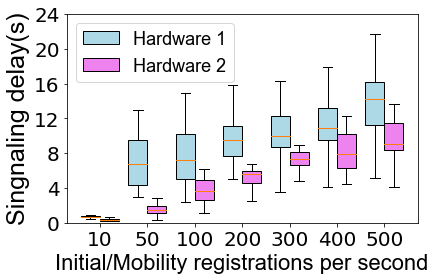

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from matplotlib.pyplot import MultipleLocator


font1 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 25,
}


font2 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 18,
}
font3 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 22,
}
# temp=[1,2,3,4,5,6,7]
#plt.step(x, y, label=name)
# plt.figure(figsize=(6, 5))
fig, ax = plt.subplots(figsize=(6,4))
plt.ylim(0, 24)
# plt.ylim(0, 15)
# plt.figure(figsize=(6, 5))
green_diamond = dict(markerfacecolor='lightgreen', marker='D')
positions2=[1.4,2.4,3.4,4.4,5.4,6.4,7.4]
loc=[1.2,2.2,3.2,4.2,5.2,6.2,7.2]
temp=ax.boxplot(delay,flierprops=green_diamond,patch_artist=True,showfliers = False,widths=0.4) 
for patch in temp['boxes']:
    patch.set_facecolor("lightblue")
temp2=ax.boxplot(delay_station,flierprops=green_diamond,patch_artist=True,showfliers = False,positions=positions2,widths=0.4) 
for patch in temp2['boxes']:
    patch.set_facecolor("violet")
# ax.set_xticklabels(x)
plt.xticks(loc,x)

ax.legend([temp["boxes"][0], temp2["boxes"][0]], ['Hardware 1', 'Hardware 2'], loc='upper left',prop=font2)
y_major_locator=MultipleLocator(4)

ax.yaxis.set_major_locator(y_major_locator)
# plt.axhline(y=1.38, color='r', linestyle='--',label='Actual 5G Registeration delay')

# plt.plot(x, delay,color="black",linewidth="5",label='Raspberry Pi 4')
plt.xlabel("Initial/Mobility registrations per second",font3)
plt.ylabel("Singnaling delay(s)",font1)
# plt.legend(prop=font2)

ax.tick_params(labelsize=20)


plt.tight_layout()
# plt.savefig("figure8a.png")
plt.savefig("figure8a.pdf")

plt.show()

In [4]:
from datetime import datetime 
x=[10,50,100,200,300,400,500]
delay=[]
delay_line_satation=[]
delay_aka=[]
for i in range(len(x)):
    lines=[]
    with open("data/session/work-station/"+str(int(x[i]))+".txt","r") as file:
        lines=file.readlines()
    temp_delay=[]
    temp_delay_aka=[]
    temp_delay_pdu=[]
    send={}
    for line in lines:
        #Session establishment start from `Retransmitting PDU Session Establishment Request`, end at `PDU Session establishment is successful PSI[2]`.
        if "Retransmitting PDU Session Establishment Request" in line:
            usr=line.split('[')[2].split("|")[0]
            # print(usr)
            send[usr]=datetime.strptime(line.split(']')[0][1:],"%Y-%m-%d %H:%M:%S.%f")
        if "PDU Session establishment is successful PSI[2]" in line:
            usr=line.split('[')[2].split("|")[0]
            dd=(datetime.strptime(line.split(']')[0][1:],"%Y-%m-%d %H:%M:%S.%f")-send[usr]).total_seconds()
            temp_delay.append(dd)
    ms=0
    delay.append(temp_delay)
    for j in temp_delay:
        ms=ms+j
    if len(temp_delay) ==0:
        delay_line_satation.append(0)
    else:    
        delay_line_satation.append(ms/len(temp_delay))



In [5]:
from datetime import datetime 
x=[10,50,100,200,300,400,500]
delay_pi=[]
delay_line_pi=[]
delay_aka=[]
for i in range(len(x)):
    lines=[]
    with open("data/session/raspberry-pi/"+str(int(x[i]))+".txt","r") as file:
        lines=file.readlines()
    temp_delay=[]
    temp_delay_aka=[]
    temp_delay_pdu=[]
    send={}
    for line in lines:
        if "Retransmitting PDU Session Establishment Request" in line:
            usr=line.split('[')[2].split("|")[0]
            # print(usr)
            send[usr]=datetime.strptime(line.split(']')[0][1:],"%Y-%m-%d %H:%M:%S.%f")
        if "PDU Session establishment is successful PSI[2]" in line:
            usr=line.split('[')[2].split("|")[0]
            dd=(datetime.strptime(line.split(']')[0][1:],"%Y-%m-%d %H:%M:%S.%f")-send[usr]).total_seconds()
            temp_delay.append(dd)
    ms=0
    delay_pi.append(temp_delay)
    for j in temp_delay:
        ms=ms+j
    if len(temp_delay) ==0:
        delay_line_pi.append(0)
    else:    
        delay_line_pi.append(ms/len(temp_delay))


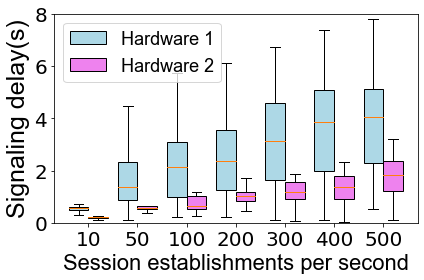

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from matplotlib.pyplot import MultipleLocator


font1 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 25,
}


font2 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 18,
}
font3 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 22,
}

fig, ax = plt.subplots(figsize=(6,4))
plt.ylim(0, 8)
green_diamond = dict(markerfacecolor='lightgreen', marker='D')
positions2=[1.4,2.4,3.4,4.4,5.4,6.4,7.4]
loc=[1.2,2.2,3.2,4.2,5.2,6.2,7.2]
temp=ax.boxplot(delay_pi,flierprops=green_diamond,patch_artist=True,showfliers = False,widths=0.4) 
for patch in temp['boxes']:
    patch.set_facecolor("lightblue")
temp2=ax.boxplot(delay,flierprops=green_diamond,patch_artist=True,showfliers = False,positions=positions2,widths=0.4) 
for patch in temp2['boxes']:
    patch.set_facecolor("violet")
# ax.set_xticklabels(x)
plt.xticks(loc,x)

ax.legend([temp["boxes"][0], temp2["boxes"][0]], ['Hardware 1', 'Hardware 2'], loc='upper left',prop=font2)
y_major_locator=MultipleLocator(2)

ax.yaxis.set_major_locator(y_major_locator)

plt.xlabel("Session establishments per second",font3)
plt.ylabel("Signaling delay(s)",font1)

ax.tick_params(labelsize=20)


plt.tight_layout()
# plt.savefig("figure8b.png")
plt.savefig("figure8b.pdf")

plt.show()